# Assignment 3 – Topic Modeling and Clustering for Online Social Media Data

*Due: Friday January 10 at 17:00 CET*

In the third assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use topic modeling and clustering to identify topics in online social media data. The objectives of this assignment are:
- understand and process the text data
- use the clustering algorithm to determine clusters in real-life data
- use the Latent Dirichlet Allocation algorithm to identify discussed topics in real-life text data 
- use the visualization tools to validate the results of unsupervised learning and interpret your findings
- reflect on the difference between two type of unsupervised learning algorithms

In this assignment, you are going to discover the different ‘topics’ from a real social media text dataset. The project is divided into two parts (4 subtasks):

- The first part contains data processing (1.1) and feature extraction (1.2) from the raw text data.
- In the second part, you will implement two methods (2.1), a topic modeling method and a clustering method, to identify topics from the processed data. Then, the evaluation will be done by using visualization tools (2.2). 

Provided files:
- The dataset: data/raw_data.txt
- A tutorial notebook showcases some packages you could use for this assignment (optional): Ass3_tutorial.ipynb
- Some sample visualization codes for interpreting the topic results: viz_example.ipynb

In [33]:
# TODO: import the packages
import io
import spacy
import preprocessor as p
import tqdm


 ## Dataset:
 The data used in this assignment is Dutch text data. We collected the COVID-19 crisis related messages from online social media (Twitter) from January to November 2021. Then, a subset of raw tweets was randomly sampled. In total, our dataset includes the text data of about 100K messages. **To protect the data privacy, please only use this dataset within the course.**

In [34]:
# read the data

def phase0_open_txt_stream(filename):
    return io.open(filename, "r", encoding="utf-8")

pipe = phase0_open_txt_stream("data/raw_data.txt")

for i in range(5):
    print(next(pipe))
    print("")

pipe.close()


Hahah, het verzet is begonnen. Het knalt hier op z'n best hoor. Voor mijn dieren vind ik het erg, maar f@ck die maffe regering hier. Gelukkig nieuwjaar!


RT @D66Vught: Het is 2021! https://t.co/LpPuFPuqR8


@MijumewAndCo Happy new year mij!


Fantastisch dat ik zoveel vuurwerk hoor..... We worden echt wakker yes. En het boeit mij niet wat een ander er van denkt.\nOp naar een Great Awakening en happy new year 😃🎉🙏❤️


Gelukkig nieuwjaar allemaal!!!! Binnen exact een maand ben ik jarig en ik hoop dat ik dan eindelijk birthdaySEX kan hebben xxx




 ## 0. Before you start the Project: 
 The provided messages in the raw dataset were collected based on 10 different themes that relate to the COVID-19 crisis. Here is a list of all themes:
 -	Lockdown
 -	Face mask
 -	Social distancing
 -	Loneliness
 -	Happiness
 -	Vaccine
 -	Testing
 -  Curfew
 -  Covid entry pass
 -  Work from home

Before starting your project, you need to first filter the messages (all messages are in Dutch) and use the messages belonging to only one theme for the topic identification. 
 
If you have submitted the theme preference, you can skip the following paragraph.

*Please notice that there will be maximum two teams working on a same theme. In this way, we hope that each group will develop their own dataset and come up with interesting results.*

 ## 1.1 Data Processing
 In the first part of the assignment, please first filter the messages and use the messages belonging to your allocated theme for the identification of topics. For that you will need to:
 -	Design your query (e.g. a regular expression or a set of keywords) and filter the related messages for your allocated theme. 
 -	Clean your filtered messages and preprocess them into the right representation. Please refer to the text data pre-processing and representation methods discussed in the lecture. You may use some of the recommended packages for text data preprocessing and representation.

In [35]:
# Load Spacy model with nl_score_news_sm
nlp = spacy.load("nl_core_news_sm")
# Add extra stop words to spacy stop word list
nlp.Defaults.stop_words.add("rt")

# TODO: filter the related messages
# Keywords for the face mask theme
kws = ['mondkap', 'mondkapje', 'masker', 'maskertje', 'mondmasker', 'kapje', 'kap', 'gezichtsmasker']  
tweets = []
data_file = 'data/raw_data.txt'

with open(data_file, "r", encoding="utf-8") as fin:
    for line in fin:
        line = line.replace('\\n', ' ')
        line = ' '.join(line.lower().strip().split())
        for kw in kws:
            if kw in line:
                tweets.append(line)
                break

print(f"Filtered {len(tweets)} tweets for the theme: Face mask")
for tweet in tweets[:10]:
    print(tweet)

# TODO: clean and preprocess the messages
# Clean tweets by removing URLs, emojis, reserved words, mentions, smileys, numbers
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER)

tweets = [p.clean(tweet) for tweet in tweets]
print("\nCleaned tweets:")
for tweet in tweets[:10]:
    print(tweet)

# TODO: represent the messages into formats that can be used in clustering or LDA algorithms (you may need different represention for two algorithms)
processed_tweets = []
for tweet in tqdm.tqdm(tweets[:2000], desc="Processing tweets"):
    tweet = nlp(tweet)
    processed_tweet = []
    for token in tweet:
        # Remove stop words
        if token.is_stop:  
            continue
        # Remove punctuation
        if token.is_punct:  
            continue
        # Lemmatization
        processed_tweet.append(token.lemma_)  
    processed_tweet = ' '.join(processed_tweet)
    processed_tweets.append(processed_tweet)

print("\nProcessed tweets:")
for tweet in processed_tweets[:10]:
    print(tweet)


Filtered 10518 tweets for the theme: Face mask
@wilmadejong1 @mariannezw @hellies8 precies. mondkapje, binnen blijven, en angst verzwakken je immuunsysteem. langdurig gebruik van een mondkapje kan zelfs schimmels veroorzaken die diep in de longen gaan zitten. gevolg longontsteking. bij ouderen zeer gevaarlijk!
@sandoka04120321 @biancalesman @telegraaf dit moet stoppen! #gerritsen🗽 #pvdkb #tk2021🇳🇱 samen sterk 👊 #jeugdzorg #jeugdbescherming #school #onderwijs #rechtstaat #ouders #kinderen #onrecht #kindermishandeling #kindermisbruik #revolutie #corona #covid #lockdown #mondkapjes #verkiezingen @pvdkb_ #neurenberg #rechten https://t.co/vfjaop7tb9
@rolandpierik @hugodejonge en daar is dus al die discussie over. mondkapjes wel/niet, wie wel, wie niet, medisch/niet-medisch. afstand houden, aerosolen, ventileren. kerk en ikea vs het sportveld. scholen open, scholen dicht, etc, etc. die regels zijn juist niet allemaal even voorstelbaar cq logisch.
@waneijs 2het is een raar virus maar de mense

Processing tweets: 100%|██████████| 2000/2000 [00:10<00:00, 195.18it/s]


Processed tweets:
mondkapje blijven angst verzwakken immuunsystemen langdurig gebruik mondkap schimmel veroorzaken diep long gaan zitten gevolg longontsteking oud gevaarlijk
stoppen Gerritsen pvdkb tk2021 samen sterk jeugdzorg jeugdbescherming school onderwijs rechtstaat ouder kind onrecht kindermishandeling kindermisbruik revolutieen corona covid lockdown mondkap verkiezing neurenberg recht
discussie mondkap Wel/niet medisch/niet-medisch afstand houden aerosol ventileren kerk Ikea vs sportveld school Open school dicht etcetera regel allemaal voorstelbaar cq logisch
raar virus mens mee jn contact komen besmet heel raar wegen maatschappelijk economisch leed aanrichten mondkap Lock down werken opengooien boel
bijvoorbeeld afdwingen invorderen mondkap minister bruin vlak omviel leiden handel tegenzin Nederland leveren invorderen product weigeren leveren maken
knap varkenskop mondkap
telkens mens heen horen zeggen blij vaccin binnenkort normaal angst groot groot datzelfde gelden mens mond

 ## 1.2 Exploratory Data Analysis
 After preprocessing the data, create at least 2 figures or tables that help you understand the data.

 While exploring the data, you may also think about questions such as:
 - Can you spot any differences between Twitter data and usual text data?
 - Does your exploration reveal some issues that would make it difficult to interpret the topics?
 - Can you improve the data by adding additional preprocessing steps?

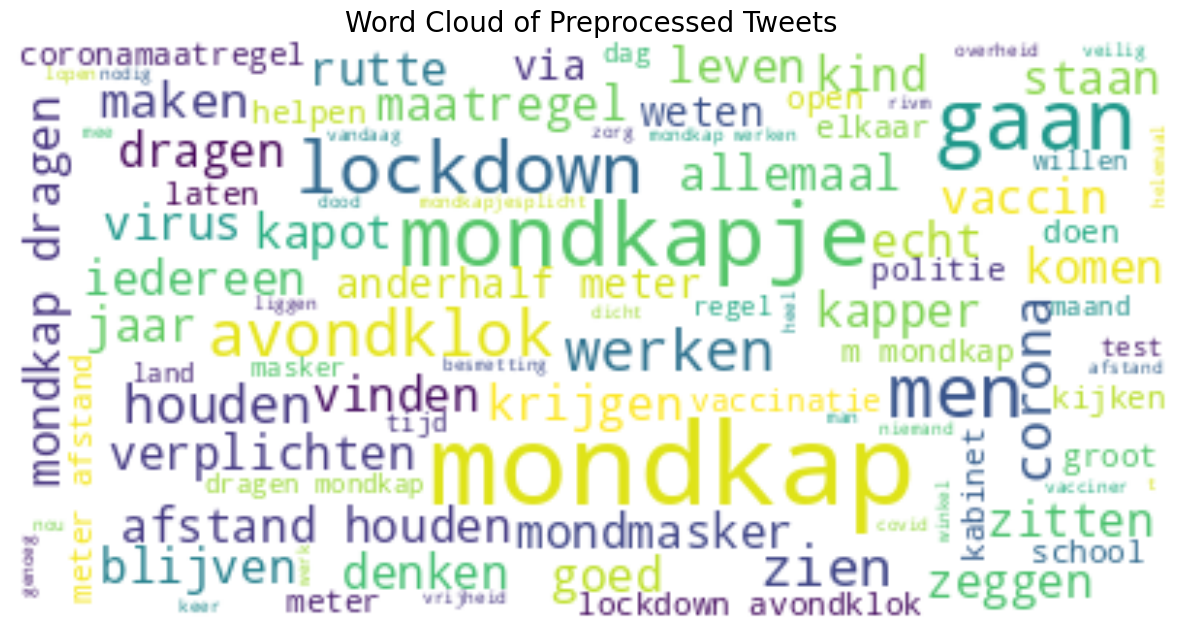

In [36]:
# TODO: plot figure(s)
# Worcloud figure
# Don't forget to pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    background_color='white',
    max_words=500,
    max_font_size=40,
    random_state=100
).generate(' '.join(processed_tweets))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Preprocessed Tweets", fontsize=20)
plt.show()


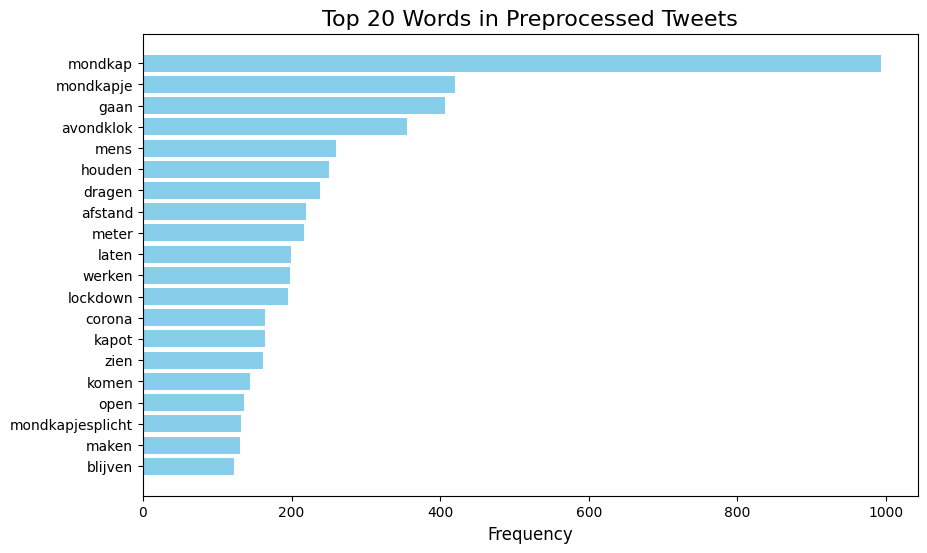

In [37]:
# TODO: plot figure(s)
from collections import Counter
import matplotlib.pyplot as plt

# Counts word frequencies
word_counts = Counter(" ".join(processed_tweets).split())
most_common_words = word_counts.most_common(20)

# Extracts words and counts
words, counts = zip(*most_common_words)

# Word frequency plot
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.title("Top 20 Words in Preprocessed Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.show()


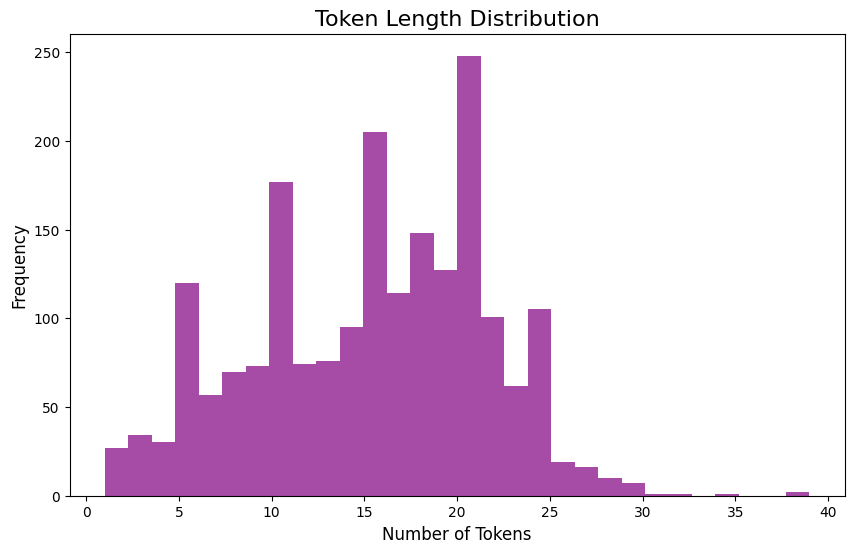

In [38]:
# TODO: plot figure(s)
# Calculates token lengths
token_lengths = [len(tweet.split()) for tweet in processed_tweets]

# Token length plot
plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=30, color='purple', alpha=0.7)
plt.title("Token Length Distribution", fontsize=16)
plt.xlabel("Number of Tokens", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


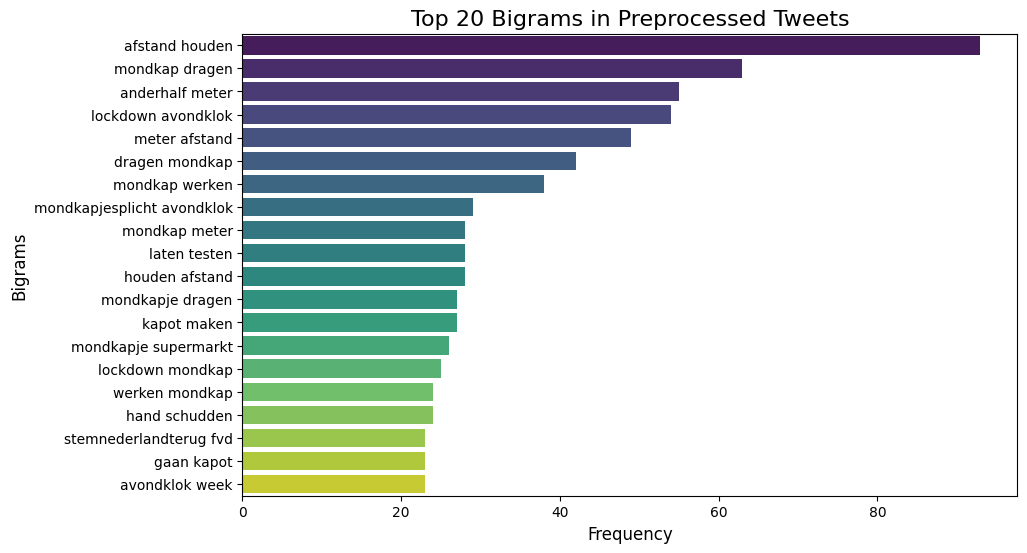

In [39]:
# TODO: plot figure(s)
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import numpy as np

# Extracts bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(processed_tweets)
bigram_counts = np.asarray(X.sum(axis=0)).flatten()
bigram_features = vectorizer.get_feature_names_out()

# Creates dataframe of bigram frequencies
bigram_data = sorted(zip(bigram_counts, bigram_features), reverse=True)[:20]
counts, bigrams = zip(*bigram_data)

# Bigram plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(bigrams), hue=bigram_data, palette="viridis", legend=False)
plt.title("Top 20 Bigrams in Preprocessed Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Bigrams", fontsize=12)
plt.show()


## 2.1 Topic modelling and clustering
 In the second part of the assignment, you will first:
 -	Implement a Latent Dirichlet Allocation (LDA) algorithm to identify the discussed topics for your theme
 -	Implement a clustering method  to cluster messages into different groups, then represent the topic of each cluster using a bag of words

While implementing the algorithms, you may use the codes from the recommended packages. In the final report, please explain reasons to select the used algorithm/package. 

In [40]:
# TODO: topic modeling using the LDA algorithm


In [41]:
# TODO: cluster the messages using a clustering algorithm


 ## 2.2 Results, evaluation and Interpretation 
 
Finally, you will describe, evaluate and interpret your findings from two methods. 

- In the report, you need to describe and discuss the similarity and difference of results from two methods.
- While evaluating the results, human judgment is very important, so visualization techniques are helpful to evaluate the identified topics in an interpreted manner. 
    
1. For evaluating the topic modelling algorithm, please first use the interactive tool **[pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=)** to examine the inter-topic separation of your findings. 

2. For interpreting the identified topics / clusters of both algorithms, we provide example code for several visualization techiques. You can use multiple ones to evaluate your results or come up with visualisations on your own. The files contain examples for how to use the visualisation functions.


In [42]:
# TODO: evaluation 


# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Use an LLM-based topic modeling method (for instance, **[BERTopic](https://maartengr.github.io/BERTopic/index.html)** or **[Fastopic](https://github.com/BobXWu/Fastopic)** to identify topics for your theme. Discuss your findings and explain why your chosen method is better (or worse) than LDA.

2. Can you think of other evaluation methods than the provided visualization techniques? If so, implement one and explain why it is a good evaluation for our task.